In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#df_test=pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_test.csv")
#df_train=pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_train.csv")
#df_train_labels=pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_train_labels.csv")
#df_valid_data=pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_valid.csv")
#df_param=pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/param.csv")


In [360]:
df_train = pd.read_csv("D:/AIWORKFORCE/PROJECT 14 (PCA)/arcene_train.csv",sep=" ", header=None)
df_train = df_train.dropna(axis=1, how="all")

n_features = df_train.shape[1]

columns = []
for i in range(n_features):
    columns.append(f"f{i+1}")  

df_train.columns = columns

print(df_train.shape)
print(df_train.head(10))



(100, 10000)
    f1   f2   f3   f4  f5   f6   f7  f8  f9  f10  ...  f9991  f9992  f9993  \
0    0   71    0   95   0  538  404  20   0    0  ...    255    570     86   
1    0   41   82  165  60  554  379   0  71    0  ...    213    605     69   
2    0    0    1   40   0  451  402   0   0    0  ...    235    593     28   
3    0   56   44  275  14  511  470   0   0    0  ...     91    600      0   
4  105    0  141  348   0  268  329   0   0    1  ...    813      0      0   
5   38   62    0  251  75  515    0   9  85  300  ...    272    454      0   
6   76   80  236  213   0  324  361  21   0    0  ...    840      2     82   
7   47    4  207  222   0  323  130   0   0   32  ...    855     11    141   
8    0   17    5   82   0  395  471   0   0    0  ...    128    583     51   
9   38  113  186  456  86  261  129   0  82   62  ...    176    309     75   

   f9994  f9995  f9996  f9997  f9998  f9999  f10000  
0      0     36      0     80      0      0     524  
1      7    473     

In [361]:
df_train.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f9991', 'f9992', 'f9993', 'f9994', 'f9995', 'f9996', 'f9997', 'f9998',
       'f9999', 'f10000'],
      dtype='object', length=10000)

In [362]:
df_train.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
         ..
f9996     0
f9997     0
f9998     0
f9999     0
f10000    0
Length: 10000, dtype: int64

In [363]:
df_train.duplicated().sum()

np.int64(0)

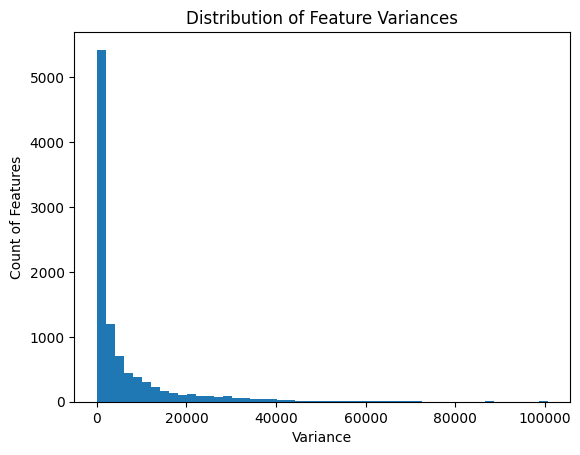

In [364]:
variances = df_train.var()
plt.hist(variances, bins=50)
plt.title("Distribution of Feature Variances")
plt.xlabel("Variance")
plt.ylabel("Count of Features")
plt.show()


In [365]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_train

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [366]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cum_var)
cum_var = np.cumsum(pca.explained_variance_ratio_)

threshold = 0.90
k = np.argmax(cum_var >= threshold) + 1
print(f"Optimal number of components for {threshold*100:.0f}% variance:", k)

Explained Variance Ratio: [0.22683503 0.10714896 0.05546639 0.04220235 0.0347477 ]
Cumulative Explained Variance: [0.22683503 0.33398399 0.38945039 0.43165273 0.46640043]
Optimal number of components for 90% variance: 1


In [367]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

scores = []
for n in [3, 5 ,10, 20, 30, 50, 100]:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=4, random_state=42).fit(X_reduced)  
    score = silhouette_score(X_reduced, kmeans.labels_)
    scores.append((n, score))

print(scores)

[(3, 0.7014389737557708), (5, 0.5573890899482843), (10, 0.43147945032629387), (20, 0.2759485258582751), (30, 0.29657618877766284), (50, 0.2513732809890563), (100, 0.15610061600948813)]


In [368]:
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (100, 10000)
Reduced shape: (100, 5)


In [369]:
X_reduced = pca.fit_transform(X_scaled)

X_reconstructed = pca.inverse_transform(X_reduced)

error = np.mean((X_scaled - X_reconstructed) ** 2)
print("Reconstruction Error:", error)


Reconstruction Error: 0.5293307758753977


In [370]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(X_pca_df.head())

         PC1        PC2        PC3        PC4       PC5
0  48.434711 -11.971637   9.384172 -13.681356 -2.791880
1  51.156409 -42.180636 -13.535727  17.885402  8.284377
2  52.047866 -13.194001   8.790789 -11.317256 -1.332949
3  43.509097 -33.819778  -7.973984  -3.685151  2.015111
4  16.622969  55.259148  -0.607176  -7.021215 -1.853969


In [371]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)



Silhouette Score: 0.5573896465031027


C:\Users\varsh\AppData\Local\Temp\ipykernel_18232\1971378067.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], cmap="viridis", s=50)


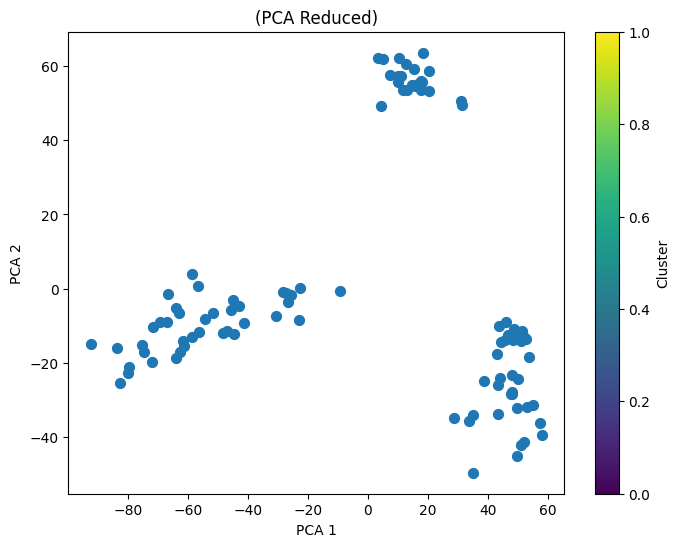

In [372]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("(PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

<Axes: >

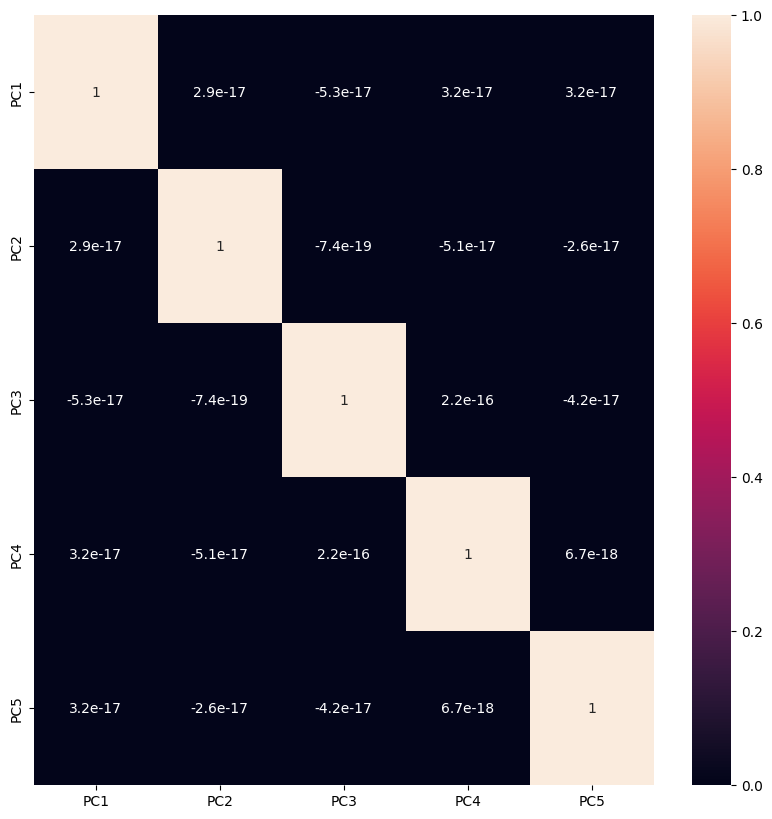

In [373]:
import seaborn as sns 

plt.figure(figsize=(10,10))
sns.heatmap(X_pca_df.corr(),annot=True)

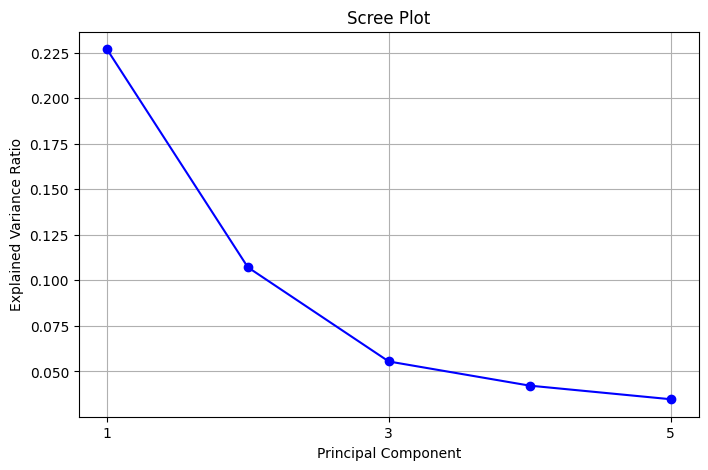

In [375]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance)+1, 2))
plt.grid(True)
plt.show()